# Multi-modal Models with LlamaIndex

With LlamaIndex we can also work with image data, but first we need to install a few dependencies first:

In [1]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/l_/k13w4mhd5hv4bddxwqz8qdfw0000gn/T/pip-req-build-fbp11rpm
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/l_/k13w4mhd5hv4bddxwqz8qdfw0000gn/T/pip-req-build-fbp11rpm
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 40.4 MB/s eta 0:00:0000:0100:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=bfd28a5c38710ff77240b36e285ffa50087fca72f9f25b02f5df32f10b445fab
  Stored in directory: /private/var/folders/l_/k13w4mhd5hv4bddxwqz8qdfw0000gn/T/pip-ephem-wheel-cac

In [6]:
import os

OPEN_AI_API_KEY = "sk-..."
os.environ["OPENAI_API_KEY"] = OPEN_AI_API_KEY

### 1. Getting the image data

We have downloaded images from Tesla website for GPT4V image reasoning

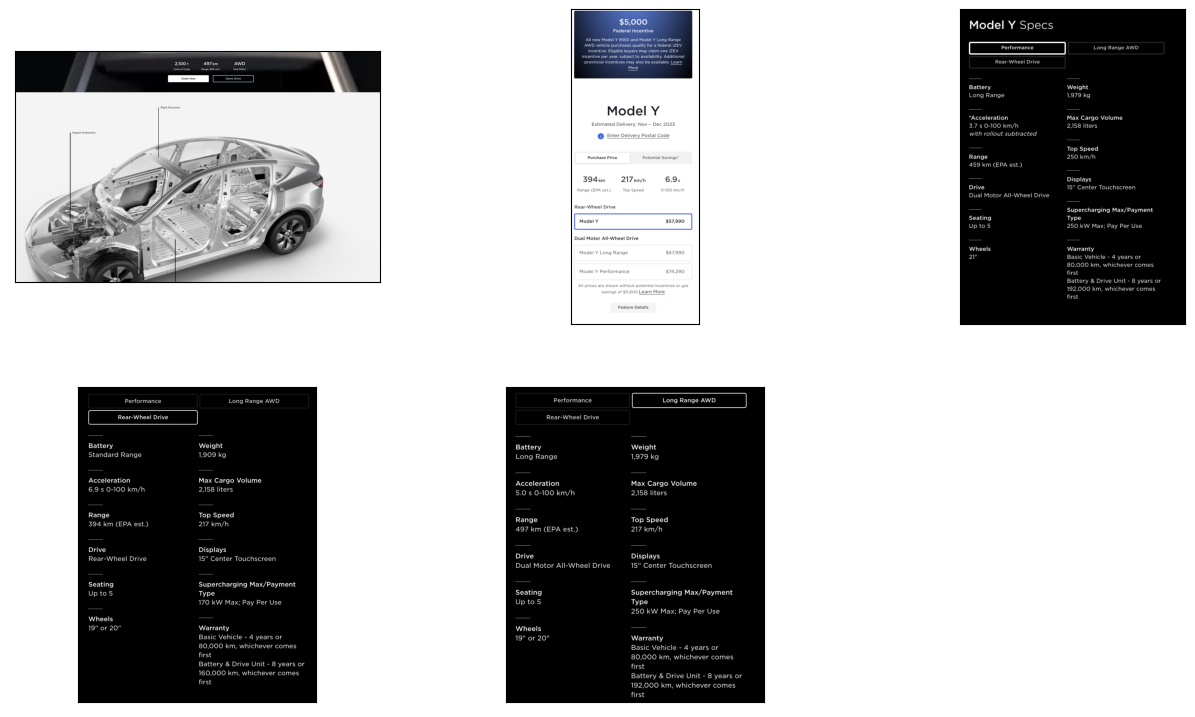

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./input_images"):
    image_paths.append(str(os.path.join("./input_images", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

### Using GPT4V to understand those input images¶

In [7]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./input_images").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPEN_AI_API_KEY, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

print(response_1)

The images provided appear to be screenshots from a website showcasing specifications and details of an electric vehicle, presumably a Tesla Model Y, based on the information presented.

Image 1: This image displays a comparison chart of two variants of a vehicle, labeled "Performance" and "Long Range AWD." The chart lists various specifications such as battery type, acceleration, range, top speed, drive type, seating, wheels, and warranty details.

Image 2: This image shows a cutaway illustration of a vehicle, highlighting its structural components. The image focuses on the rigidity and impact protection of the vehicle's frame, with labels pointing to the "Rigid Structure" and "Impact Protection" features.

Image 3: This image is similar to the first one, showing a comparison chart of the "Model Y Performance" and "Long Range AWD" variants with specifications like battery, acceleration, range, top speed, drive type, seating, wheels, and warranty.

Image 4: This image presents pricing 

In [8]:
response_2 = openai_mm_llm.complete(
    prompt="Can you tell me what is the price with each spec?",
    image_documents=image_documents,
)

print(response_2)

The images you've provided show specifications and pricing for different variants of the Tesla Model Y. Here's a summary of the prices along with their respective specifications:

1. Model Y Rear-Wheel Drive:
   - Price: $57,990
   - Battery: Long Range
   - Acceleration: 6.9 seconds 0-100 km/h
   - Range: 394 km (EPA est.)
   - Drive: Rear-Wheel Drive
   - Seating: Up to 5
   - Wheels: 19" or 20"
   - Top Speed: 217 km/h
   - Display: 15" Center Touchscreen
   - Warranty: Basic Vehicle - 4 years or 80,000 km, whichever comes first

2. Model Y Dual Motor All-Wheel Drive (Long Range AWD):
   - Price: $67,990
   - Battery: Long Range
   - Acceleration: 5.0 seconds 0-100 km/h
   - Range: 497 km (EPA est.)
   - Drive: Dual Motor All-Wheel Drive
   - Seating: Up to 5
   - Wheels: 19" or 20"
   - Top Speed: 217 km/h
   - Display: 15" Center Touchscreen
   - Warranty: Basic Vehicle - 4 years or 80,000 km, whichever comes first

3. Model Y Performance:
   - Price: $74,990
   - Battery: Long Ra